In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white

In [2]:
df=pd.read_excel('Dataset.xlsx').set_index('nama_kabupaten_kota')

In [3]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# print("Kabupaten/Kota yang Memiliki Nilai Outlier:")
# print(df[((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)])
# print('\n')
df = df[~((df< (Q1 - 1.5 * IQR)) |(df> (Q3 + 1.5 * IQR))).any(axis=1)]
# print("Kabupaten/Kota Shape Setelah Membuang Ouliers:", df.shape)

In [4]:
df.describe()

,umur_harapan_hidup,persentase_keluhan_kesehatan,persentase_menderita_sakit,persentase_berobat_jalan,persentase_rawat_inap,persentase_jamkes_berobat_jalan,fasilitas_kesehatan_per_kapita
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000
mean,69.818927,0.286270,0.137461,0.448521,0.048588,0.517506,0.000055
std,3.202363,0.075307,0.040900,0.111611,0.017331,0.221405,0.000037
min,60.640000,0.089600,0.022800,0.188000,0.003700,0.067100,0.000000
25%,67.660000,0.235675,0.108225,0.371350,0.037625,0.320600,0.000028
50%,69.980000,0.289100,0.136650,0.446800,0.047650,0.509450,0.000048
75%,72.060000,0.337550,0.167800,0.527000,0.059850,0.681000,0.000076
max,77.650000,0.473600,0.260900,0.761700,0.095000,1.000000,0.000167


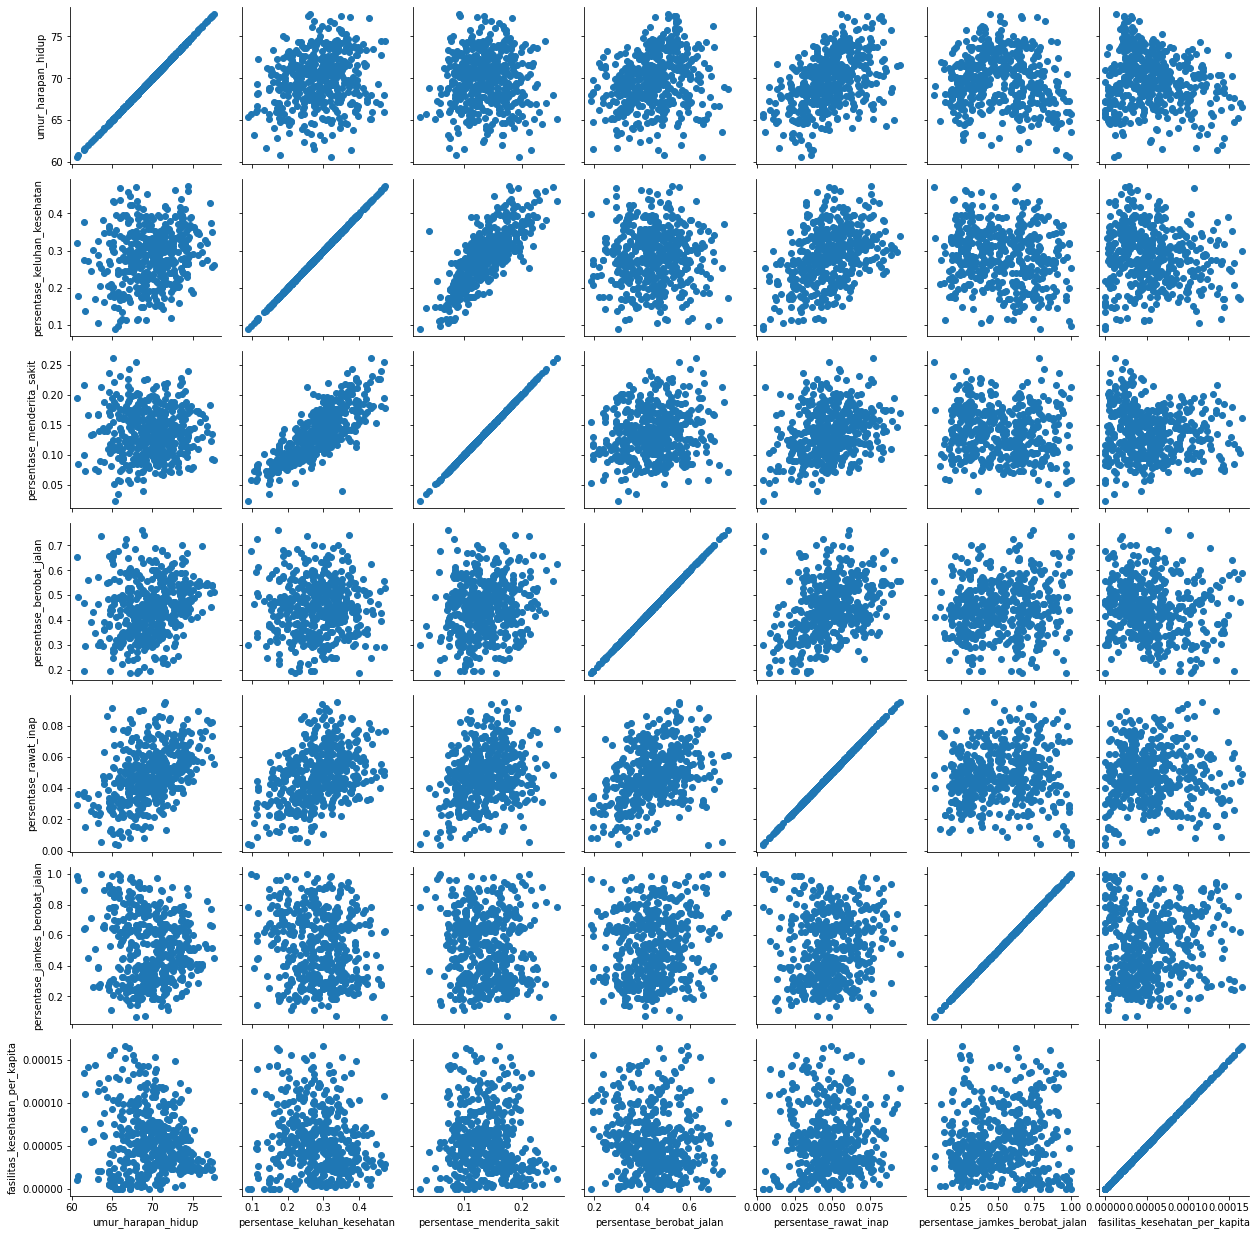

In [5]:
g = sns.PairGrid(df)
g.map(plt.scatter)

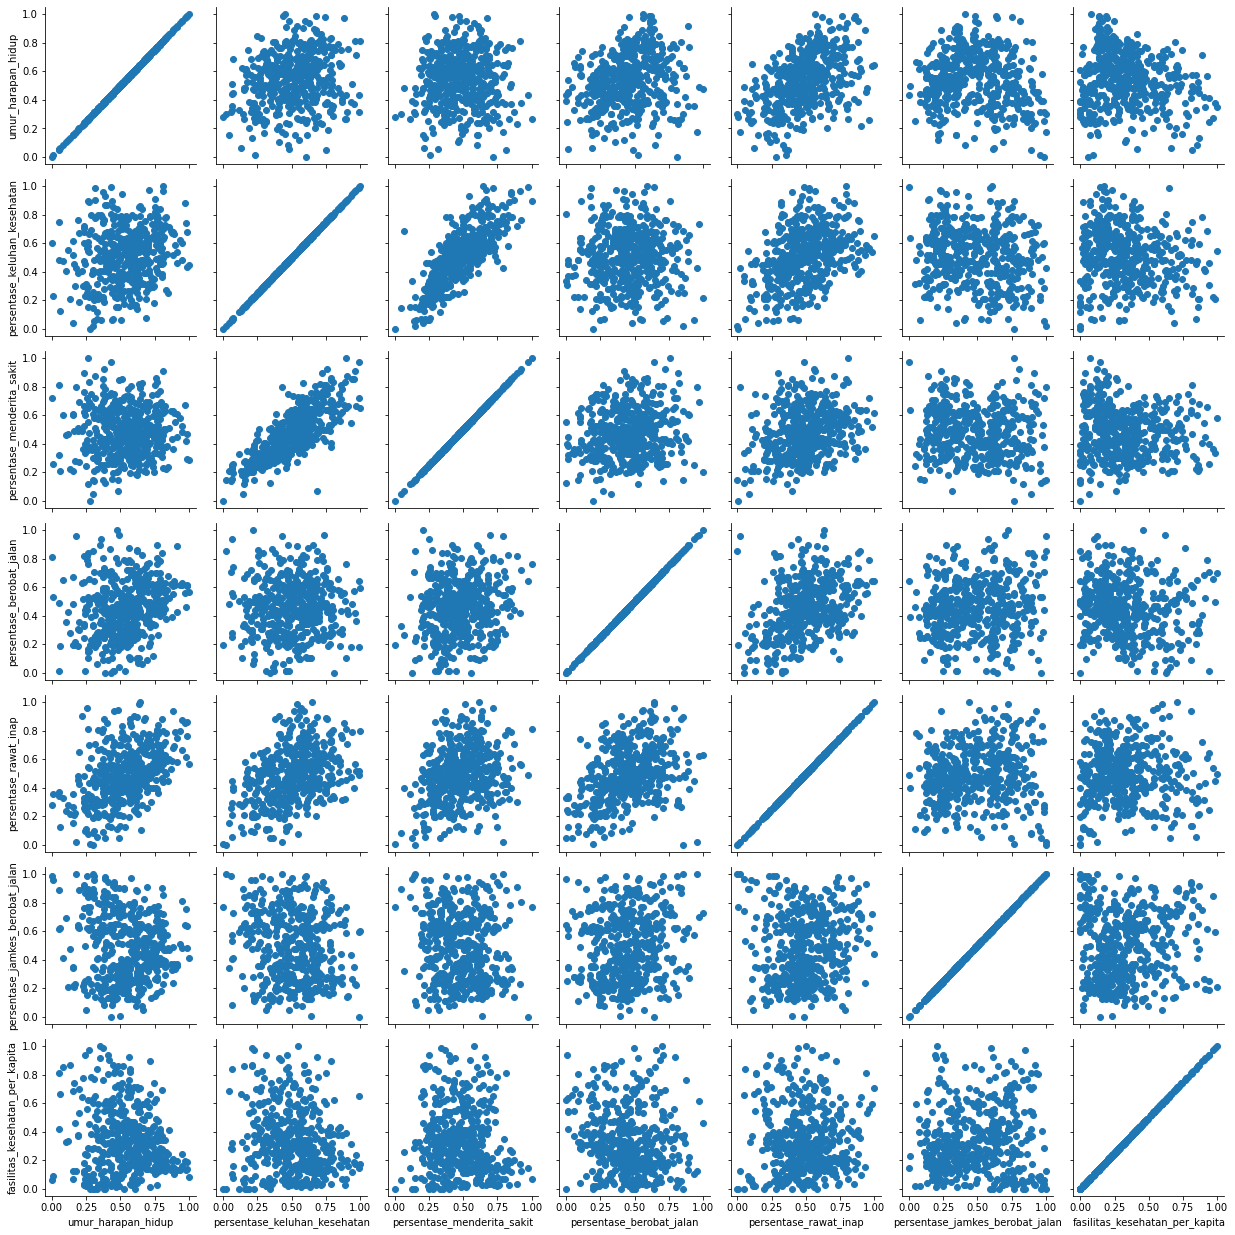

In [6]:
from sklearn import preprocessing
import pandas as pd
scaler = preprocessing.MinMaxScaler()
names = df.columns
d = scaler.fit_transform(df)
scaled_df = pd.DataFrame(d, columns=names)
g = sns.PairGrid(scaled_df)
g.map(plt.scatter)

In [7]:
# df['kkxms'] = df['persentase_keluhan_kesehatan']*df['persentase_menderita_sakit']
# df['bjxri'] = df['persentase_berobat_jalan']*df['persentase_rawat_inap']
# df['logfasilitas_kesehatan_per_kapita'] = np.log(df['fasilitas_kesehatan_per_kapita'])

In [8]:
df.corr()

,umur_harapan_hidup,persentase_keluhan_kesehatan,persentase_menderita_sakit,persentase_berobat_jalan,persentase_rawat_inap,persentase_jamkes_berobat_jalan,fasilitas_kesehatan_per_kapita
umur_harapan_hidup,1.000000,0.180055,-0.004154,0.215713,0.466190,-0.112463,-0.162640
persentase_keluhan_kesehatan,0.180055,1.000000,0.788652,0.004433,0.402614,-0.140327,-0.144643
persentase_menderita_sakit,-0.004154,0.788652,1.000000,0.157632,0.271405,-0.090415,-0.127885
persentase_berobat_jalan,0.215713,0.004433,0.157632,1.000000,0.386936,0.137387,-0.112155
persentase_rawat_inap,0.466190,0.402614,0.271405,0.386936,1.000000,0.119771,-0.004297
persentase_jamkes_berobat_jalan,-0.112463,-0.140327,-0.090415,0.137387,0.119771,1.000000,0.106978
fasilitas_kesehatan_per_kapita,-0.162640,-0.144643,-0.127885,-0.112155,-0.004297,0.106978,1.000000


In [9]:
import statsmodels.formula.api as smf
model = smf.ols(formula='umur_harapan_hidup ~ persentase_keluhan_kesehatan + persentase_menderita_sakit + persentase_berobat_jalan + persentase_rawat_inap + persentase_jamkes_berobat_jalan + np.log(fasilitas_kesehatan_per_kapita, out = np.zeros_like(fasilitas_kesehatan_per_kapita), where=(fasilitas_kesehatan_per_kapita!=0))', data=scaled_df)
# model = smf.ols(formula='umur_harapan_hidup ~ umur_harapan_hidup', data=df)
#model = sm.OLS(y, X)
res = model.fit()
residuals = res.resid
predicted = res.fittedvalues
#observed = y

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:     umur_harapan_hidup   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     33.51
Date:                Sat, 07 May 2022   Prob (F-statistic):           1.57e-33
Time:                        21:08:18   Log-Likelihood:                 202.09
No. Observations:                 466   AIC:                            -390.2
Df Residuals:                     459   BIC:                            -361.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                                                                                                             coef    std err          t      P>|t|      [0.025      0.975]
-------

#Random Forest

c:\Users\ZENI\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='umur_harapan_hidup', ylabel='Density'>

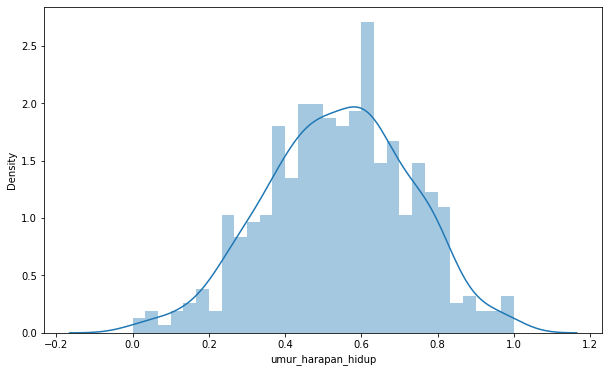

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.distplot(scaled_df.umur_harapan_hidup,bins=30)

c:\Users\ZENI\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='persentase_keluhan_kesehatan', ylabel='Density'>

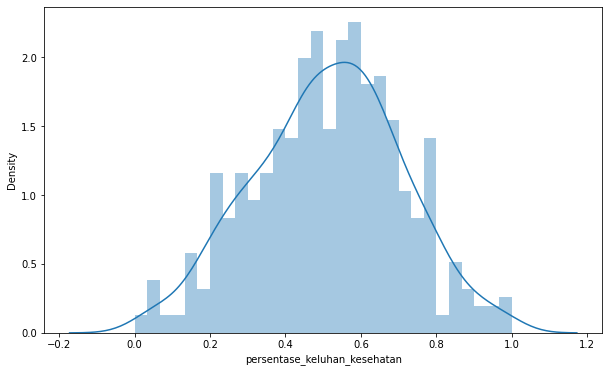

In [11]:
plt.figure(figsize=(10, 6))
sns.distplot(scaled_df.persentase_keluhan_kesehatan,bins=30)

c:\Users\ZENI\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='persentase_menderita_sakit', ylabel='Density'>

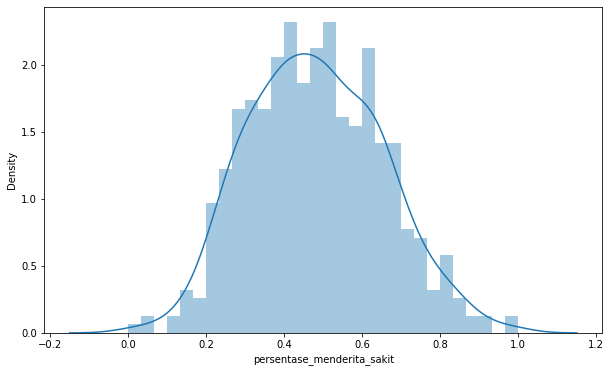

In [12]:
plt.figure(figsize=(10, 6))
sns.distplot(scaled_df.persentase_menderita_sakit,bins=30)

c:\Users\ZENI\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='persentase_berobat_jalan', ylabel='Density'>

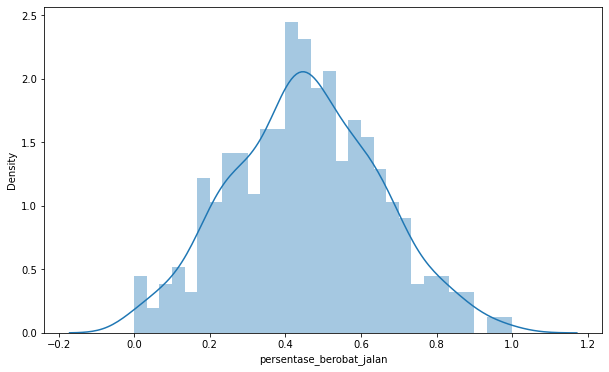

In [13]:
plt.figure(figsize=(10, 6))
sns.distplot(scaled_df.persentase_berobat_jalan,bins=30)

c:\Users\ZENI\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='persentase_rawat_inap', ylabel='Density'>

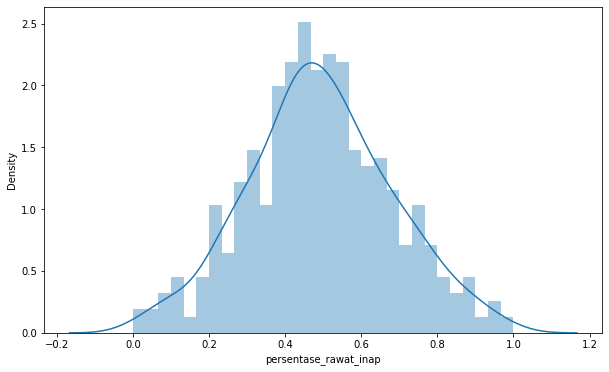

In [14]:
plt.figure(figsize=(10, 6))
sns.distplot(scaled_df.persentase_rawat_inap,bins=30)

c:\Users\ZENI\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='persentase_jamkes_berobat_jalan', ylabel='Density'>

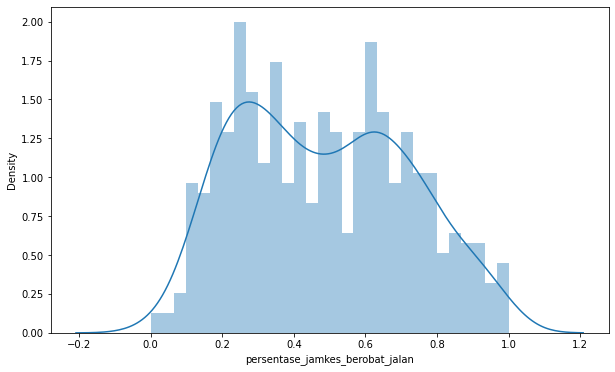

In [15]:
plt.figure(figsize=(10, 6))
sns.distplot(scaled_df.persentase_jamkes_berobat_jalan,bins=30)

c:\Users\ZENI\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fasilitas_kesehatan_per_kapita', ylabel='Density'>

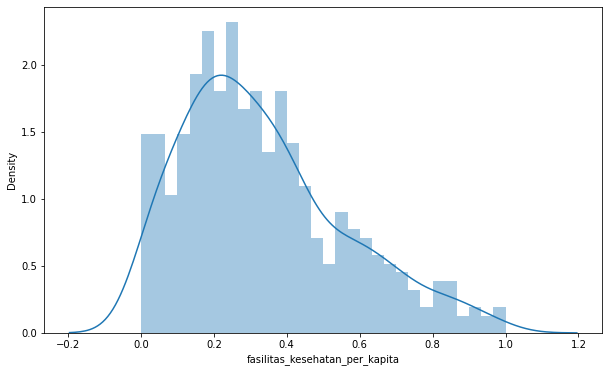

In [16]:
plt.figure(figsize=(10, 6))
sns.distplot(scaled_df.fasilitas_kesehatan_per_kapita,bins=30)

In [22]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1, oob_score=True) 

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
	return scores

def evaluate_maemodel(model, X, y):
  # define the evaluation procedure
  cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
	# evaluate the model and collect the results
  maescores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
  mappescores = cross_val_score(model, X, y, scoring='neg_mean_absolute_percentage_error', cv=cv, n_jobs=-1, error_score='raise')
  return maescores, mappescores



# get the models to evaluate
models = model

# evaluate the models and store results
results, names = list(), list()

X = scaled_df.copy()
X.drop(['umur_harapan_hidup'],axis=1,inplace=True)

y = scaled_df['umur_harapan_hidup'].copy()

# evaluate the model
scores = evaluate_model(model, X, y)
maescores, mappescores = evaluate_maemodel(model, X, y)

# store the results
#results.append(scores)
#names.append(name)

# summarize the performance along the way
print('R2 %.3f (%.3f)' % (mean(scores), std(scores)))
print('mae %.3f (%.3f)' % (mean(maescores), std(maescores)))
print('mappe %.3f (%.3f)' % (mean(mappescores), std(mappescores)))

model.fit(X, y)
print(model.score(X,y))

# plot model performance for comparison
#pyplot.boxplot(results, labels=names, showmeans=True)
#pyplot.show()

print('Base Model Full Train Score = ', model.score(X,y))

R2 0.352 (0.106)
mae -0.118 (0.008)
mappe -2391908276780.075 (4785194079717.676)
0.9166318679465899
Base Model Full Train Score =  0.9166318679465899


c:\Users\ZENI\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [24]:
print(maescores)

[-0.11799799 -0.11848141 -0.11416504 -0.10099259 -0.12597378 -0.10891022
 -0.12497784 -0.12041026 -0.11780888 -0.12212456 -0.11593975 -0.11745829
 -0.10570936 -0.12251642 -0.13335628]


In [23]:
print(mappescores)

[-8.09337914e-01 -2.55266262e-01 -3.62905099e-01 -1.96053554e-01
 -1.22687240e+13 -1.19697721e+13 -2.95100427e-01 -6.70591705e-01
 -2.84403710e-01 -4.56005514e-01 -7.14823239e-01 -1.16401281e+13
 -2.29269692e-01 -3.17935927e-01 -4.21298351e-01]


In [18]:
def feat_importance(m, df_train):
    importance = m.feature_importances_
    importance = pd.DataFrame(importance, index=df_train.columns, columns=["Importance"])
    return importance.sort_values(by=['Importance'],ascending=False)

def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

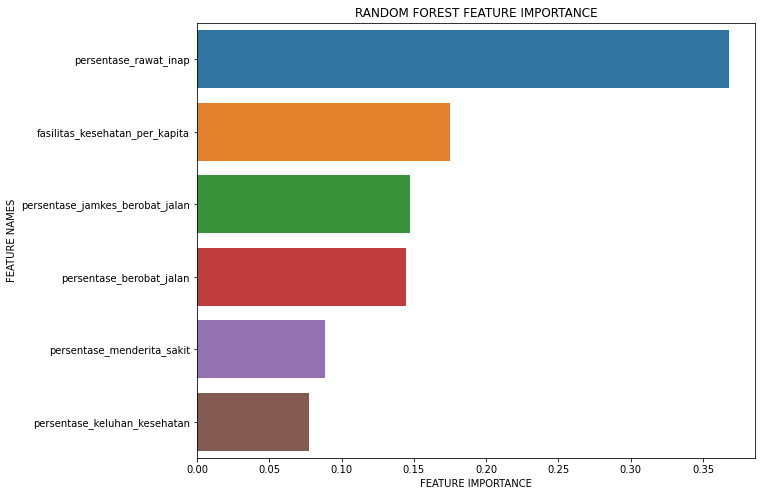

In [19]:
importance = feat_importance(model, X)
plot_feature_importance(importance['Importance'],importance.index,'RANDOM FOREST ')